# Capstone 2 Housing Prices - Data Wrangling<a id='Data_wrangling'></a>

## 1 Data Collection

Goal: Organize your data to streamline the next steps of your capstone


1.1 Data Loading


~~1.2 Data Joining (Not needed as data came in one training set)~~

    
  

In [1]:
#imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


import sys
sys.path.insert(1, '/Users/swechakranthi/Desktop/Github/DataScience-Capstone2-Housing/library')
from sb_utils import save_file

In [2]:
#1.1 Data Loading

# the supplied CSV data file is the raw_data directory
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')


In [3]:
# Check data count and view data
print(f'Number of rows in Training Set: {train_data.shape[0]}')
print(f'Number of rows in Test Set: {test_data.shape[0]} ')


Number of rows in Training Set: 1460
Number of rows in Test Set: 1459 


## 2 Data Organization

Goal: Create a file structure and add work to the GitHub

File Structure:
/data => contains all the data sets that come with the project @ https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

/Notebooks => contain various notebooks for this project for each step

/Library => contains sb_utils package from capstone 1
    

## 3 Data Definition

Goal: Gain an understanding of your data features to inform the
next steps of your project.

3.1 Column names and Description of the columns

    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


In [4]:
#3.1 Column names and Description of the columns

#### Print a list of all columns

# print('Here is the list of columns')

# for col in train_data.columns:
#    print(col)
# print('________________________________________________')



3.2 Data types

In [5]:
#3.2
pd.set_option('display.max_rows', 90)

#Check data types
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


3.3 Counts and percents unique values

In [6]:
#3.3 Counts of unique values
uniqueValues = train_data.nunique()
print('Count of unique values in each column :')
print(uniqueValues)

Count of unique values in each column :
Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF      

In [7]:
#Pandas Profiling Installation Steps

# (uncomment and run below if you need to pip install the pandas-profiling library)

#import sys
#!{sys.executable} -m pip install -U pandas-profiling==2.9.0
#!jupyter nbextension enable --py widgetsnbextension


3.4 View Data

In [8]:
#3.4 View data manually
print('***********************************************************************')
print('_____Lets take a look at train data set___________________________________________')
print(train_data)
print('________________________________________________')
train_data.describe()


***********************************************************************
_____Lets take a look at train data set___________________________________________
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717  

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
#view data via a pandas profile
import pandas_profiling
from pandas_profiling.utils.cache import cache_file
from pandas_profiling import ProfileReport


In [10]:
#profile = ProfileReport(train_data, title="Pandas Profiling Report", minimal=True, check_correlation=False)
#profile.to_widgets()
#profile_report = train_data.profile_report(explorative=True, html={'style': {'full_width': True}},correlations={"cramers": {"calculate": False}})
#profile_report
#profile_report.to_file("Housing_Data_Report.html")


## 4 Data Cleaning
Goal: Clean up the data in order to prepare it for the next steps of
your project.

~~4.1 Duplicates~~

    No Duplicate rows or columns
    
~~4.2 NA or missing values~~

    Data has no columns with all missing data.
    


In [11]:
#4.1 Delete any duplicate data
duplicate = train_data.duplicated()
print(duplicate.sum())

0


In [12]:
#4.2 Are there null values
train_data.isnull().values.any()

True

In [13]:
#list the null value count of all columns
pd.set_option('display.max_rows', 90)
print("List of null values for each column: \n")
Missing_count = train_data.isna().sum().sort_values(ascending = False)[:25]
missing = pd.concat([Missing_count, (Missing_count/len(train_data))*100], axis=1, keys = ["count", "%"])
missing_type = pd.concat([train_data.isna().sum().sort_values(ascending = False), (train_data.isna().sum().sort_values(ascending = False)/len(train_data))*100,train_data.dtypes], axis=1, keys = ["count", "%", "types"])
print(missing_type.sort_values(by=["count"], ascending = False))
print('***********************************************************************')

print(f'Number of duplicate rows: {train_data.duplicated().sum()} ')


print(f'null row counts: {missing.astype(bool).sum(axis=0)}')



List of null values for each column: 

               count          %    types
PoolQC          1453  99.520548   object
MiscFeature     1406  96.301370   object
Alley           1369  93.767123   object
Fence           1179  80.753425   object
FireplaceQu      690  47.260274   object
LotFrontage      259  17.739726  float64
GarageYrBlt       81   5.547945  float64
GarageCond        81   5.547945   object
GarageFinish      81   5.547945   object
GarageQual        81   5.547945   object
GarageType        81   5.547945   object
BsmtFinType2      38   2.602740   object
BsmtExposure      38   2.602740   object
BsmtQual          37   2.534247   object
BsmtCond          37   2.534247   object
BsmtFinType1      37   2.534247   object
MasVnrType         8   0.547945   object
MasVnrArea         8   0.547945  float64
Electrical         1   0.068493   object
Condition1         0   0.000000   object
Neighborhood       0   0.000000   object
LotConfig          0   0.000000   object
YearBuilt         

...We have to adjust data for the 19 columns that have null values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'PoolQC'),
  Text(1, 0, 'MiscFeature'),
  Text(2, 0, 'Alley'),
  Text(3, 0, 'Fence'),
  Text(4, 0, 'FireplaceQu'),
  Text(5, 0, 'LotFrontage'),
  Text(6, 0, 'GarageYrBlt'),
  Text(7, 0, 'GarageCond'),
  Text(8, 0, 'GarageType'),
  Text(9, 0, 'GarageFinish'),
  Text(10, 0, 'GarageQual'),
  Text(11, 0, 'BsmtFinType2'),
  Text(12, 0, 'BsmtExposure'),
  Text(13, 0, 'BsmtQual'),
  Text(14, 0, 'BsmtCond'),
  Text(15, 0, 'BsmtFinType1'),
  Text(16, 0, 'MasVnrArea'),
  Text(17, 0, 'MasVnrType'),
  Text(18, 0, 'Electrical'),
  Text(19, 0, 'Id'),
  Text(20, 0, 'Functional'),
  Text(21, 0, 'Fireplaces'),
  Text(22, 0, 'KitchenQual'),
  Text(23, 0, 'KitchenAbvGr'),
  Text(24, 0, 'BedroomAbvGr')])

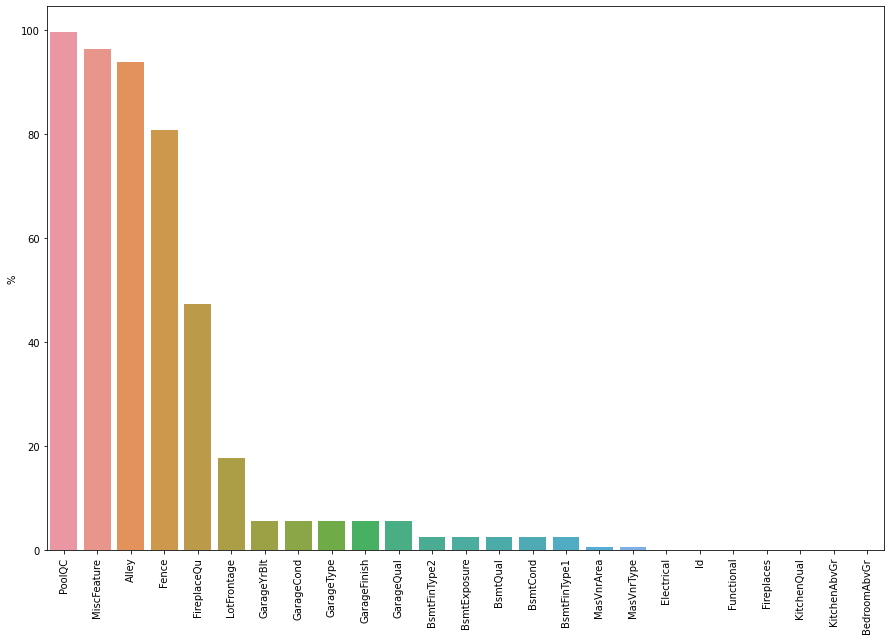

In [14]:
plt.figure(figsize=(15,10))
sns.barplot(x =missing.index,y = '%',data=missing)
plt.xticks(rotation ='90')

In [15]:
#Test Data
print("List of null values for each column in Test Data: \n")
Missing_count1 = test_data.isna().sum().sort_values(ascending = False)[:40]
missing1 = pd.concat([Missing_count1, (Missing_count1/len(test_data))*100], axis=1, keys = ["count", "%"])
print(missing1.sort_values(by=["count"], ascending = False))
print('***********************************************************************')

print(f'Number of duplicate rows: {train_data.duplicated().sum()} ')
print(f'null row counts: {missing1.astype(bool).sum(axis=0)}')



List of null values for each column in Test Data: 

              count          %
PoolQC         1456  99.794380
MiscFeature    1408  96.504455
Alley          1352  92.666210
Fence          1169  80.123372
FireplaceQu     730  50.034270
LotFrontage     227  15.558602
GarageYrBlt      78   5.346127
GarageQual       78   5.346127
GarageFinish     78   5.346127
GarageCond       78   5.346127
GarageType       76   5.209047
BsmtCond         45   3.084304
BsmtQual         44   3.015764
BsmtExposure     44   3.015764
BsmtFinType1     42   2.878684
BsmtFinType2     42   2.878684
MasVnrType       16   1.096642
MasVnrArea       15   1.028101
MSZoning          4   0.274160
Functional        2   0.137080
BsmtFullBath      2   0.137080
Utilities         2   0.137080
BsmtHalfBath      2   0.137080
Exterior2nd       1   0.068540
SaleType          1   0.068540
BsmtFinSF1        1   0.068540
Exterior1st       1   0.068540
GarageCars        1   0.068540
GarageArea        1   0.068540
TotalBsmtSF       

In [16]:
train_data['Id'].is_unique

True

### Replacing the Missing Data 


#### Train Data
 we need to adjust for all the null data using the data descriptions

In [17]:
# All the following values can have NA filled with None since they are catagorical
for i in ('PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish','GarageCond',
          'GarageQual','BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType'):
  train_data[i] = train_data[i].fillna('None')
#'LotFrontage' is numerical column w/ outliers, so it should be filled with median
train_data['LotFrontage']= train_data['LotFrontage'].fillna(train_data.LotFrontage.median())  
#GarageYrBlt: Year garage was built can be replaced with mean as it has no outliers
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].fillna(train_data.GarageYrBlt.mean())
#All the following values can have NA filled with 0 since they are numeric values
for i in ('GarageCars','GarageArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','MasVnrArea'):
  train_data[i] = train_data[i].fillna(0)

In [18]:
print('Value count of all unique values in Electrical:')
print(train_data['Electrical'].value_counts())
print('Most Common value in Electrical:')
train_data['Electrical'].mode()

Value count of all unique values in Electrical:
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
Most Common value in Electrical:


0    SBrkr
dtype: object

In [19]:
#Replace NA with most common catagorical value of this column
train_data['Electrical'] = train_data['Electrical'].fillna('SBrkr')

In [20]:
#replace index with Id

#train_data.set_index('Id',inplace=True)
#train_data.head()

#### Test Data

In [21]:
# Test Data needs to get cleaned
# All the following values can have NA filled with None since they are catagorical
for i in ('PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish','GarageCond',
          'GarageQual','BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType'):
  test_data[i] = test_data[i].fillna('None')
#'LotFrontage' is numerical column w/ outliers, so it should be filled with median
test_data['LotFrontage']= test_data['LotFrontage'].fillna(test_data.LotFrontage.median())  
#GarageYrBlt: Year garage was built can be replaced with mean as it has no outliers
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(test_data.GarageYrBlt.mean())
#All the following values can have NA filled with 0 since they are numeric values
for i in ('GarageCars','GarageArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','MasVnrArea'):
  test_data[i] = test_data[i].fillna(0)


In [22]:
#Replace NA with most common catagorical value of column Electrical
print('Most Common value in Electrical:')
test_data['Electrical'].mode()

Most Common value in Electrical:


0    SBrkr
dtype: object

In [23]:
test_data['Electrical'] = test_data['Electrical'].fillna('SBrkr')

In [24]:
#Replace NA with most common catagorical value of column Electrical
print('Most Common value in MSZoning:')
test_data['MSZoning'].mode()


Most Common value in MSZoning:


0    RL
dtype: object

In [25]:
test_data['MSZoning'] = test_data['MSZoning'].fillna('RL')
test_data['MSZoning'].isna().sum()

0

In [26]:
#Utilities
test_data['Utilities'].mode()

0    AllPub
dtype: object

In [27]:
test_data['Utilities'] = test_data['Utilities'].fillna('AllPub')
test_data['Utilities'].isna().sum()

0

In [28]:
test_data['Functional'].mode()


0    Typ
dtype: object

In [29]:
test_data['Functional'] = test_data['Functional'].fillna('Typ')
test_data['Functional'].isna().sum()


0

In [30]:
test_data['KitchenQual'].mode()


0    TA
dtype: object

In [31]:
test_data['KitchenQual'] = test_data['KitchenQual'].fillna('TA')
test_data['KitchenQual'].isna().sum()

0

In [32]:
test_data['Exterior2nd'].mode(), test_data['Exterior1st'].mode()

(0    VinylSd
 dtype: object,
 0    VinylSd
 dtype: object)

In [33]:
for i in ('Exterior2nd','Exterior1st'):
  test_data[i] = test_data[i].fillna('VinylSd')
test_data['Exterior2nd'].isna().sum()

0

In [34]:
test_data['Exterior1st'].isna().sum()

0

In [35]:
test_data['SaleType'].mode()

0    WD
dtype: object

In [36]:
test_data['SaleType'] = test_data['SaleType'].fillna('WD')
test_data['SaleType'].isna().sum()

0

### Recheck For Null values


In [37]:
pd.set_option('display.max_rows', 8)


missing_train = pd.concat([train_data.isna().sum().sort_values(ascending = False), (train_data.isna().sum().sort_values(ascending = False)/len(train_data))*100], axis=1, keys = ["count", "%"])

missing_test = pd.concat([test_data.isna().sum().sort_values(ascending = False), (test_data.isna().sum().sort_values(ascending = False)/len(test_data))*100], axis=1, keys = ["count", "%"])

missing_train

,count,%
Id,0,0.0
CentralAir,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
...,...,...
MasVnrType,0,0.0
Exterior2nd,0,0.0
Exterior1st,0,0.0
SalePrice,0,0.0


In [38]:
missing_test

,count,%
Id,0,0.0
MSSubClass,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0
...,...,...
Exterior2nd,0,0.0
Exterior1st,0,0.0
RoofMatl,0,0.0
SaleCondition,0,0.0


## SAVE DATA

In [39]:
datapath = '../data'
save_file(train_data, 'train_data-cleaned.csv', datapath)
save_file(test_data, 'test_data-cleaned.csv', datapath)

A file already exists with this name.



Do you want to overwrite? (Y/N) y


Writing file.  "../data/train_data-cleaned.csv"
A file already exists with this name.



Do you want to overwrite? (Y/N) y


Writing file.  "../data/test_data-cleaned.csv"
